# Relax Inc. Take-Home Challenge

# step 1: Import data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import timedelta
%matplotlib inline


In [2]:
user_engage = pd.read_csv('C:/Users/wuhao/Desktop/springboard/relax_challenge/takehome_user_engagement.csv')
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
#check how many user and how many visited by users
number_of_users =  user_engage['user_id'].nunique()
print(number_of_users)
print(len(user_engage.visited))

8823
207917


In [4]:
#convert time_stamp into datatime format
user_engage['time_stamp'] = pd.to_datetime( user_engage['time_stamp'], format = '%Y-%m-%d %H:%M:%S')

In [5]:
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
user_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
# define a funtion to test whether one user has logged into the product on there separate days in at least one seven-day period 

def test(data, period = 7, login = 3):
    #drop duplicate days
    data['date'] = data['time_stamp'].dt.date
    #check how many days has passed for every 3 logins
    passed_days = data['date'].diff(periods = login - 1)
    # return any passed_days is less than 7
    return any(passed_days <= timedelta(days = period))


In [8]:
users_adopted = user_engage.groupby('user_id').apply(test)
users_adopted.name = 'adopted_user'
print(sum(users_adopted))
print(len(users_adopted))
#print('pecentage of adopted users:'.format(sum(users_adopted)/len(users_adopted)))
print(sum(users_adopted)/len(users_adopted))

1656
8823
0.18769126147568854


In [9]:
# read the user data

In [10]:
users_data = pd.read_csv('C:/Users/wuhao/Desktop/springboard/relax_challenge/takehome_users.csv')
users_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


# step 2: Exploratory Data Analysis

In [12]:
# transfer the 'creation_time' and last_session_creation_time to datetime
users_data['creation_time'] = pd.to_datetime(
    users_data['creation_time'], format='%Y-%m-%d %H:%M:%S')
users_data['last_session_creation_time'] = pd.to_datetime(
    users_data['last_session_creation_time'], unit='s')


In [13]:
# define a new column as account_history which is a difference between creation_time and last_session_creation_time 
users_data['account_history'] = users_data['last_session_creation_time'] - users_data['creation_time']
users_data['account_history'] = users_data['account_history'].dt.days


In [14]:
#define a new column as account_age which which is a difference between creation_time and now
now = max(users_data['creation_time'])
users_data['account_age'] = now - users_data['creation_time']
users_data['account_age'] = users_data['account_age'].dt.days

In [15]:
users_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,account_history,account_age
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,38
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.0,196
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,437
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,374
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0,498


In [16]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  account_history             8823 non-null   float64       
 11  account_age                 12000 non-null  int64     

In [17]:
#drop the original two column creation_time and last_session_creation_time
users_data = users_data.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [18]:
users_data.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,account_history,account_age
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0.0,38
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,136.0,196
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0.0,437
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,1.0,374
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,5.0,498


In [19]:
#concate the users_data with users_adopted for futher use

users_data = users_data.set_index('object_id')
users_data.index.name = 'user_id'
data = pd.concat([users_data, users_adopted], axis=1, join='inner')
data['adopted_user'] = data['adopted_user'].astype(int)

## step 3: Feature Engineering

In [20]:
#extract the email providers for construct a new feature column

data['email_provider'] = [x.split('@')[1] for x in data.email]

top_emails = data.email_provider.value_counts().index[:10]


data['email_provider'] = [x if x in top_emails else 'other' for x in data.email_provider]

In [21]:
data.head(100)

,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,account_history,account_age,adopted_user,email_provider
user_id,,,,,,,,,,,
1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0.0,38,0,yahoo.com
2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,136.0,196,1,gustr.com
3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0.0,437,0,gustr.com
4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,1.0,374,0,yahoo.com
5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,5.0,498,0,yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...
119,Patel Callum,CallumPatel@jourrapide.com,SIGNUP,0,0,184,NaN,1.0,613,0,jourrapide.com
121,Toft Dennis,DennisMToft@cuvox.de,GUEST_INVITE,1,0,402,121.0,0.0,512,0,cuvox.de
123,Morse Aaron,AaronRMorse@jourrapide.com,SIGNUP,0,0,103,NaN,1.0,76,0,jourrapide.com


In [22]:
# use labelEncoder to label creation_source, org_id, invited_by_user_id and email_provider

In [23]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
creation_labels = gle.fit_transform(data['creation_source'])
data.creation_source = creation_labels

org_id_labels = gle.fit_transform(data['org_id'])
data.org_id = org_id_labels

invited_labels = gle.fit_transform(data['invited_by_user_id'])
data.invited_by_user_id = invited_labels

email_labels = gle.fit_transform(data['email_provider'])
data.email_provider = email_labels

In [24]:
data.head(100)

,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,account_history,account_age,adopted_user,email_provider
user_id,,,,,,,,,,,
1,Clausen August,AugustCClausen@yahoo.com,0,1,0,11,2023,0.0,38,0,10
2,Poole Matthew,MatthewPoole@gustr.com,1,0,0,1,47,136.0,196,1,2
3,Bottrill Mitchell,MitchellBottrill@gustr.com,1,0,0,94,263,0.0,437,0,2
4,Clausen Nicklas,NicklasSClausen@yahoo.com,0,0,0,1,966,1.0,374,0,10
5,Raw Grace,GraceRaw@yahoo.com,0,0,0,193,983,5.0,498,0,10
...,...,...,...,...,...,...,...,...,...,...,...
119,Patel Callum,CallumPatel@jourrapide.com,3,0,0,184,2229,1.0,613,0,4
121,Toft Dennis,DennisMToft@cuvox.de,0,1,0,402,18,0.0,512,0,0
123,Morse Aaron,AaronRMorse@jourrapide.com,3,0,0,103,2229,1.0,76,0,4


In [25]:
# drop those columns which can not been used under machine learning 

In [39]:
data.drop(['email', 'name'],inplace = True, axis=1)

In [40]:
data.head(100)

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,account_history,account_age,adopted_user,email_provider
user_id,,,,,,,,,
1,0,1,0,11,2023,0.0,38,0,10
2,1,0,0,1,47,136.0,196,1,2
3,1,0,0,94,263,0.0,437,0,2
4,0,0,0,1,966,1.0,374,0,10
5,0,0,0,193,983,5.0,498,0,10
...,...,...,...,...,...,...,...,...,...
119,3,0,0,184,2229,1.0,613,0,4
121,0,1,0,402,18,0.0,512,0,0
123,3,0,0,103,2229,1.0,76,0,4


## step 4: Model Selection 

In [41]:

from sklearn.linear_model import RidgeClassifier, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import  RandomizedSearchCV, KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from xgboost import XGBClassifier, cv, plot_importance 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import warnings             
warnings.filterwarnings('ignore')

In [42]:
y = data['adopted_user']
X = data.drop('adopted_user', axis=1)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.3, random_state=42)


In [43]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)

In [44]:
lgb = LGBMClassifier()
xgb = XGBClassifier()
ridge = RidgeClassifier()
svC = SVC()
gbr = GradientBoostingClassifier()
rf = RandomForestClassifier()


models = [lgb, xgb, ridge, svC, gbr, rf]
model_names = ['lgb','xgb','ridge','svr','gbr','rf']
scores = {}
 
for i, model in enumerate(models):
    score = rmse_cv(model)
    print('{} rmse score: {:.4f}, rmse std: {:.4f}'.format(model_names[i], score.mean(), score.std()))
    scores[model_names[i]] = (score.mean(), score.std())
    
rmse_df = pd.DataFrame(scores, index=['rmse_score','rmse_std'])
rmse_df.sort_values('rmse_score', axis=1, inplace=True)
rmse_df

lgb rmse score: 0.2023, rmse std: 0.0109
[19:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:43] WARNING: C:/Users/

,rf,gbr,lgb,xgb,svr,ridge
rmse_score,0.192987,0.193373,0.202260,0.205736,0.209522,0.281213
rmse_std,0.012546,0.015315,0.010911,0.007845,0.008728,0.012074


In [45]:

clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('RandomForestClassifier Best parameters were', model.best_params_)
print('RandomForestClassifier Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 200}
Best average precision was 0.9608165297485686


In [50]:
gbc = GradientBoostingClassifier(random_state=42)
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(gbc, params)
model.fit(Xtrain, ytrain)
print('GradientBoostingClassifier Best parameters were', model.best_params_)
print('GradientBoostingClassifier Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 10}
Best average precision was 0.9629208757517393


In [46]:
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9644880997355497
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2136
           1       0.94      0.88      0.91       511

    accuracy                           0.96      2647
   macro avg       0.95      0.93      0.94      2647
weighted avg       0.96      0.96      0.96      2647



In [51]:

model = GradientBoostingClassifier(random_state=42, n_estimators=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9610880241783151
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2136
           1       0.97      0.83      0.89       511

    accuracy                           0.96      2647
   macro avg       0.96      0.91      0.93      2647
weighted avg       0.96      0.96      0.96      2647



In [ ]:
# in sum, both RandomForest and GradientBoosting did great prediction here. We can pick RF for my particular selection.

# step 5: Show the result

# conclusion: the account histroy(account_history = last_session_creation_time - creation_time) play a key role here for the prediction.

In [47]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
print(importance)

account_history               0.831485
account_age                   0.062806
org_id                        0.047099
invited_by_user_id            0.025043
email_provider                0.015303
creation_source               0.011335
opted_in_to_mailing_list      0.003879
enabled_for_marketing_drip    0.003050
dtype: float64


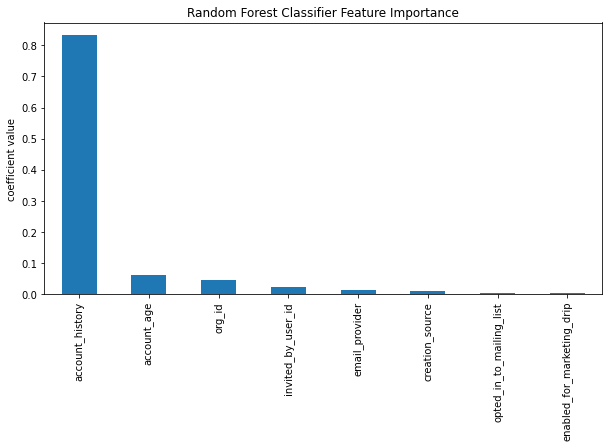

In [48]:

plt.figure(figsize=(10,5))
(importance).nlargest(10).plot(kind='bar', x=importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()